In [1]:
#Se importan las librerias necesarias para tratar el dataset
%matplotlib inline
from time import time
import glob
import os
import re 
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import svm
import numpy as np
import pandas as pd
import PIL
import random
from PIL import Image

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def natural_key(string_):
    
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

In [3]:
TRAIN_DIR = 'data/train/'
TEST_DIR = 'data/test/'

In [4]:
train_cats = sorted(glob.glob(os.path.join(TRAIN_DIR, 'cat*.jpg')), key=natural_key)
train_dogs = sorted(glob.glob(os.path.join(TRAIN_DIR, 'dog*.jpg')), key=natural_key)
train_all = train_cats + train_dogs
y_train = np.concatenate((np.zeros(len(train_cats)), np.ones(len(train_dogs))))
test_all = sorted(glob.glob(os.path.join(TEST_DIR, '*.jpg')), key=natural_key)

13072 data/train/dog.572.jpg (500, 332)


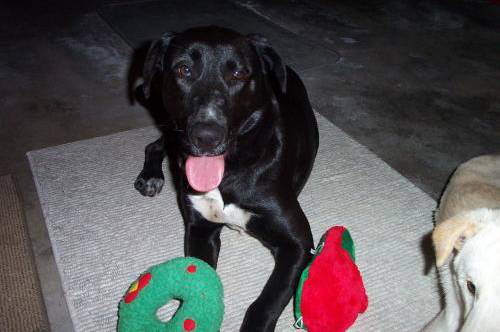

In [5]:
index = np.random.randint(0,len(train_all))
print(index,format(train_all[index]),Image.open(train_all[index]).size)
Image.open(train_all[index])

In [6]:
tiempo_inicial = time()
t_m = len(train_all)
t_r=100
image_p = np.zeros((t_m,t_r*t_r))
for i in range(t_m):
    image_p[i]=(np.mean(np.asarray(Image.open(train_all[i]).resize((t_r,t_r)),
                                   dtype=np.float64),axis=2)).reshape(1,t_r**2)
tiempo_final = time()
print(tiempo_final-tiempo_inicial)

75.31894755363464


In [7]:
image_p.shape

(25000, 10000)

Ahora procesaremos las 12500 imagenes de test, tambien las volvemos de 100x100 y procedemos a promediar su color para pasarla a escala de grises.

In [8]:
tiempo_inicial = time()
t_m=12500
t_r=100
image_test=np.zeros((t_m,100*100))
for i in range(t_m):
    image_test[i]=(np.mean(np.asarray(Image.open(test_all[i]).resize((t_r,t_r))
                                      ,dtype=np.float64),axis=2)).reshape(1,t_r**2)
tiempo_final = time()
print(tiempo_final-tiempo_inicial)

36.56336784362793


In [9]:
#se cogen las primeras 300 imagenes del test y se les da la etiqueta para luego poder sacar un score
x_test = image_test[:300]
y_test_300=[1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,
0,1,1,0,1,0,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,1,1,1,1,0,0,
0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,
1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,0,1,0,0,0,1,
1,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,
1,1,1,0]
len(y_test_300), x_test.shape

(300, (300, 10000))

In [10]:
X_train = image_p

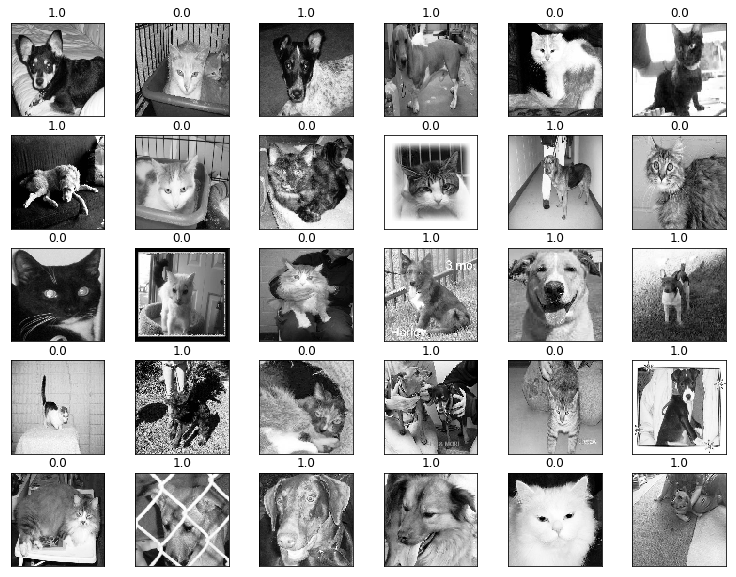

In [11]:
#dibujamos algunas imagenes de train y su respectiva clase
fig = plt.figure(figsize=(13,10))
for i in range(30):
    fig.add_subplot(5,6,(i+1),xticks=[], yticks=[])
    num=np.random.randint(0, len(train_all))
    plt.title("{}".format(y_train[num]))
    plt.imshow(X_train[num].reshape(100,100),cmap = plt.cm.Greys_r)

In [12]:
#se definen 10000 imagenes para entrenar el modelo, 5000 de gatos y 5000 de perros
X_train = np.concatenate((image_p[:2500],image_p[22500:]))
y_train = np.concatenate((np.zeros(2500), np.ones(2500)))

### CNN 

In [19]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Dense, Activation, Flatten, Dropout, MaxPooling2D
from keras.regularizers import l2
#model.add(MaxPooling2D(pool_size=(n_pool,n_pool)))
model = Sequential()#probar con border_mode='valid', same , 8 y 6
model.add(Convolution2D(64, (3, 3), padding='same', input_shape=(100, 100, 1), activation='relu'))
model.add(Convolution2D(15, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Convolution2D(12, (5, 5), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(units=64, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(units=2, kernel_regularizer=l2(0.01)))  #binary classification
model.add(Activation('softmax'))

In [20]:
#para promediar las imagenes
def average(data):
    minimum = np.min(data)
    maximum = np.max(data)
    data = (data-minimum)/(maximum-minimum)
    data = data - np.mean(data)
    return data

X_train = average(X_train)

In [ ]:
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD, RMSprop
#model.compile(loss='binary_crossentropy',
#optimizer=SGD(lr=0.005, momentum=0.9, decay=0.1, nesterov=False), metrics=['accuracy'])
#probar optimzer='admin'
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
labels_ = to_categorical(y_train, 2) #convert labels to a matrix representation 
train_ = np.resize(X_train, (len(X_train), 100, 100, 1))
model.fit(train_, labels_, epochs=20, batch_size=200)